In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv") 
personal_loan = df['Personal Loan']
df.drop(['Personal Loan'], axis=1, inplace = True)
df['Personal Loan'] = personal_loan
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [3]:
df = df.drop('ID', axis=1)
rows_count, columns_count = df.shape
print('Rows :', rows_count)
print('Columns :', columns_count)

Rows : 5000
Columns : 13


In [4]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Personal Loan           int64
dtype: object

In [5]:
df.isnull().sum() 

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

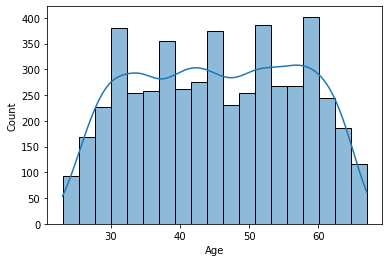

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['Age'], kde=True)  # Sử dụng kde=True để hiển thị cả Kernel Density Estimate
plt.xlabel("Age")
plt.show()

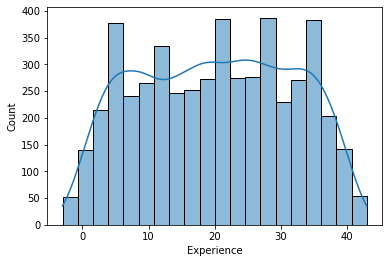

In [7]:
sns.histplot(df['Experience'], kde=True) 
plt.xlabel('Experience')
plt.show()

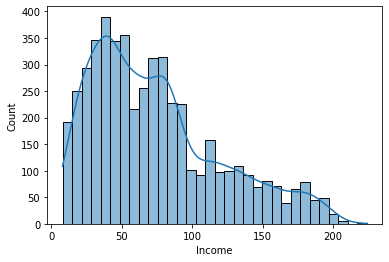

In [8]:
sns.histplot(df['Income'], kde=True) 
plt.xlabel('Income')
plt.show()

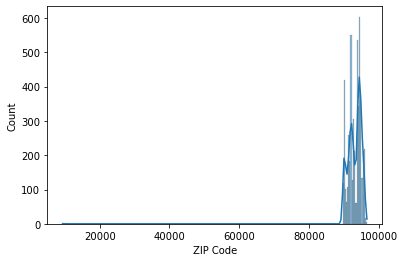

In [9]:
sns.histplot(df['ZIP Code'], kde=True) 
plt.xlabel('ZIP Code')
plt.show()

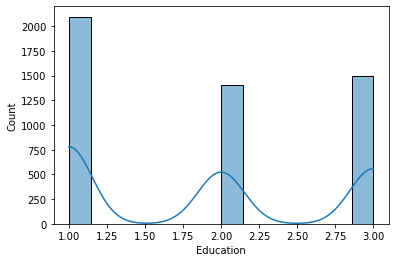

In [10]:
sns.histplot(df['Education'], kde=True) 
plt.xlabel('Education')
plt.show()

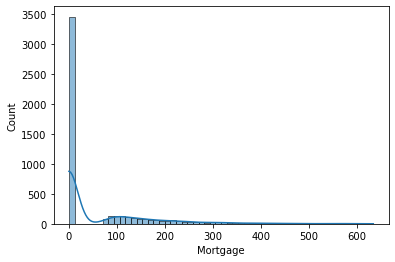

In [11]:
sns.histplot(df['Mortgage'], kde=True) 
plt.xlabel('Mortgage')
plt.show()

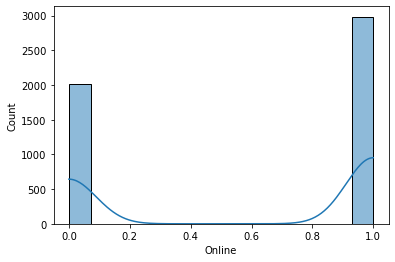

In [12]:
sns.histplot(df['Online'], kde=True) 
plt.xlabel('Online')
plt.show()

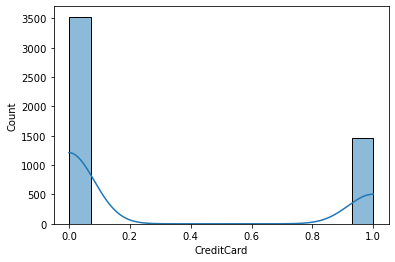

In [13]:
sns.histplot(df['CreditCard'], kde=True) 
plt.xlabel('CreditCard')
plt.show()

In [14]:
loan_count = pd.DataFrame(df["Personal Loan"].value_counts()).reset_index()
loan_count.columns =["Labels","Personal Loan"]
loan_count

,Labels,Personal Loan
0,0,4520
1,1,480


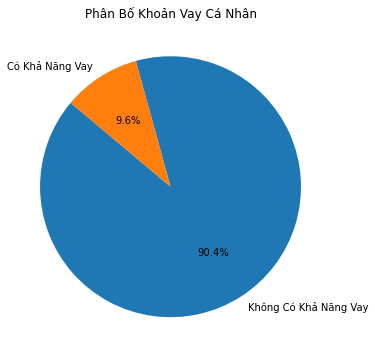

In [18]:
# Tạo một Series chứa số lượng giá trị 1 và 0 trong cột "Personal Loan"
loan_count = df['Personal Loan'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(loan_count, labels=['Không Có Khả Năng Vay', 'Có Khả Năng Vay'], autopct='%1.1f%%', startangle=140)
plt.title('Phân Bố Khoản Vay Cá Nhân')
plt.show()

# Create Models

In [22]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_LogisticRegression = LogisticRegression()
model_LogisticRegression.fit(X_train, y_train)

y_pred_lr = model_LogisticRegression.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_DecisionTree = DecisionTreeClassifier(random_state=42)
model_DecisionTree.fit(X_train, y_train)

y_pred_tree = model_DecisionTree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

In [35]:
print('------Logistic Regression-------------\n')
print('Accuracy of the Logistic Regression model is: ',accuracy_lr)
print('---------------------------------------\n')
print('-------- Decision Tree ----------------\n')
print('Accuracy of the Decision Tree model is: ', accuracy_tree)

------Logistic Regression-------------

Accuracy of the Logistic Regression model is:  0.909
---------------------------------------

-------- Decision Tree ----------------

Accuracy of the Decision Tree model is:  0.986


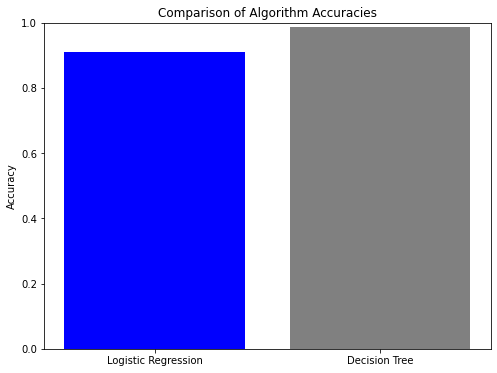

In [37]:
algorithms = ['Logistic Regression', 'Decision Tree']
accuracies = [accuracy_lr, accuracy_tree]

plt.figure(figsize=(8, 6))
plt.bar(algorithms, accuracies, color=['blue', 'gray'])
plt.ylabel('Accuracy')
plt.title('Comparison of Algorithm Accuracies')
plt.ylim(0.0, 1.0)  
plt.show()